<a href="https://colab.research.google.com/github/shaurink98/Time-Series-Analysis/blob/main/Time_Series_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# QUESTION 1


## package installation

In [ ]:
!pip install ts2vg

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install igraph

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install pycairo
!pip install cairocffi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached pycairo-1.23.0.tar.gz (344 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  ERROR: Failed building wheel for pycairo
Failed to build pycairo
ERROR: Could not build wheels for pycairo which use PEP 517 and cannot be installed directly
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


##code

In [ ]:
import os
import pandas as pd
import numpy as np
from ts2vg import NaturalVG
from ts2vg import HorizontalVG
import matplotlib.pyplot as plt


In [ ]:
#Initializing lists for different parameters required such as Axis in the data, Activities of the subject, body part concerned and the Method for Time series
axis = ['attr_x','attr_y','attr_z']
Activity=['running','walking','climbingup','climbingdown']
Body_Part= ['head','chest']
Method=['NVG', 'HVG']

#Initializing a Dataframe for storing the results in a tabular format.
f_h_c= pd.DataFrame(columns=['Method','Accelerometer axis','Average Degree','Network Diameter','Average Path Length','Activity','Body Part'])

#k=1
for c in range(1,16):          #initializing range for the 15 subjects
  for i1 in Activity:
    for j1 in Body_Part:
      dataframe_list = []
      df = pd.read_csv('s' + str(c) + '_acc_'+ i1 +'_' + j1 +".csv")       #setting up a common line of code to read all the different csv files
      df1 = df[1000:2024]                                                 #as specified in the question sample size from 1000 to 2024

      for x in Method:                                                   #initializing for loop for selecting one of the two methods NVG or HVG 
        if x == 'NVG':                                                   #following loop if method selected is NVG
          for col in axis:
            g =  NaturalVG()                                             
            g.build(df1[col])                                         
            ig_g = g.as_igraph()
            avg_deg = np.mean(ig_g.degree())
            net_dia = ig_g.diameter()
            avg_path = ig_g.average_path_length()
            f_h_c = f_h_c.append({'Method':x,'Subject':c,'Accelerometer axis':col,'Average Degree':avg_deg,
                            'Network Diameter':net_dia,'Average Path Length':avg_path,'Activity':i1,'Body Part':j1},
                          ignore_index=True)                            #appending the results in table
            
        elif x == 'HVG':
          for col in axis:                                              #following loop if method selected is HVG
            h =  HorizontalVG()
            h.build(df1[col])
            ig_g = h.as_igraph()
            avg_deg = np.mean(ig_g.degree())
            net_dia = ig_g.diameter()
            avg_path = ig_g.average_path_length()
            f_h_c = f_h_c.append({'Method':x,'Subject':c,'Accelerometer axis':col,'Average Degree':avg_deg,
                            'Network Diameter':net_dia,'Average Path Length':avg_path,'Activity':i1,'Body Part':j1},
                          ignore_index=True)                           #appending the results in table



In [ ]:
f_h_c

,Method,Accelerometer axis,Average Degree,Network Diameter,Average Path Length,Activity,Body Part,Subject
0,NVG,attr_x,9.601562,9,4.617489,running,head,1.0
1,NVG,attr_y,9.013672,9,4.969256,running,head,1.0
2,NVG,attr_z,8.146484,10,4.960036,running,head,1.0
3,HVG,attr_x,3.953125,31,10.856393,running,head,1.0
4,HVG,attr_y,3.964844,21,7.211907,running,head,1.0
...,...,...,...,...,...,...,...,...
715,NVG,attr_y,14.156250,15,5.840334,climbingdown,chest,15.0
716,NVG,attr_z,8.953125,10,4.692061,climbingdown,chest,15.0
717,HVG,attr_x,3.951172,33,13.926625,climbingdown,chest,15.0
718,HVG,attr_y,3.941406,31,13.582100,climbingdown,chest,15.0


## Tabulating the Dataframe

In [ ]:
from tabulate import tabulate              #importing the tabulate package 
print(tabulate(f_h_c, headers=["Methods","Accelerometer axis","Average Degree","Network Diameter","Average Path Length","Activity","Body Part","Subject"],showindex="never"))

Methods    Accelerometer axis      Average Degree    Network Diameter    Average Path Length  Activity      Body Part      Subject
---------  --------------------  ----------------  ------------------  ---------------------  ------------  -----------  ---------
NVG        attr_x                         9.60156                   9                4.61749  running       head                 1
NVG        attr_y                         9.01367                   9                4.96926  running       head                 1
NVG        attr_z                         8.14648                  10                4.96004  running       head                 1
HVG        attr_x                         3.95312                  31               10.8564   running       head                 1
HVG        attr_y                         3.96484                  21                7.21191  running       head                 1
HVG        attr_z                         3.95898                  21              

## Scatter Plot for Running and Walking

<Figure size 1080x1080 with 0 Axes>

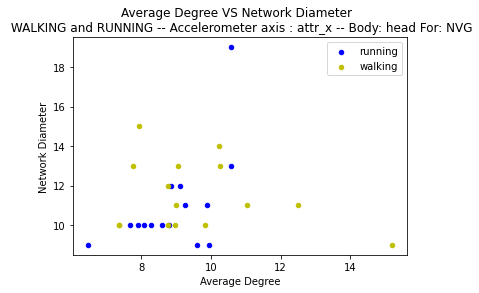

<Figure size 1080x1080 with 0 Axes>

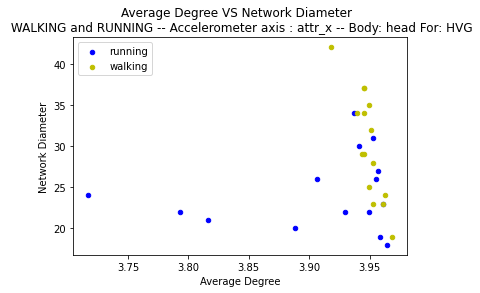

<Figure size 1080x1080 with 0 Axes>

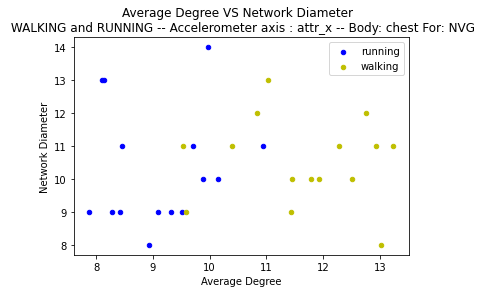

<Figure size 1080x1080 with 0 Axes>

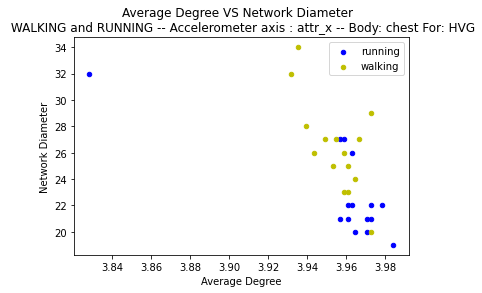

<Figure size 1080x1080 with 0 Axes>

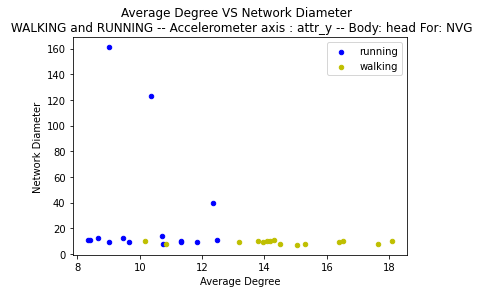

<Figure size 1080x1080 with 0 Axes>

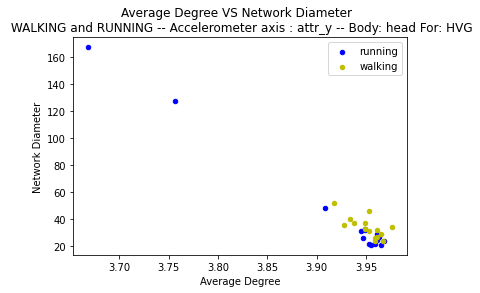

<Figure size 1080x1080 with 0 Axes>

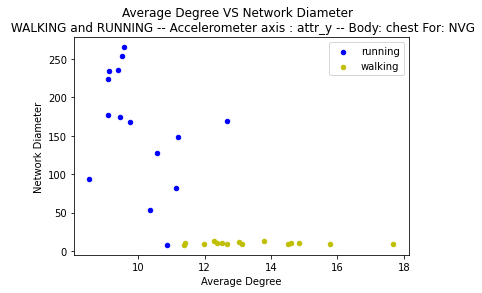

<Figure size 1080x1080 with 0 Axes>

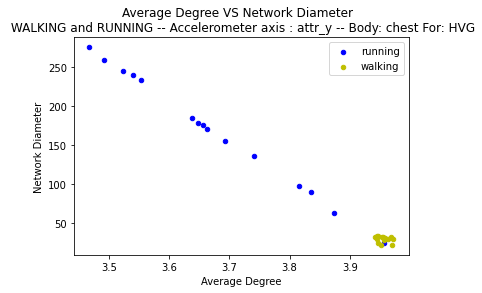

<Figure size 1080x1080 with 0 Axes>

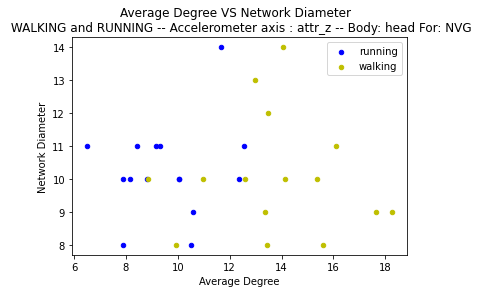

<Figure size 1080x1080 with 0 Axes>

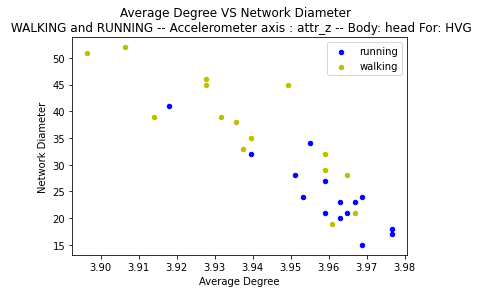

<Figure size 1080x1080 with 0 Axes>

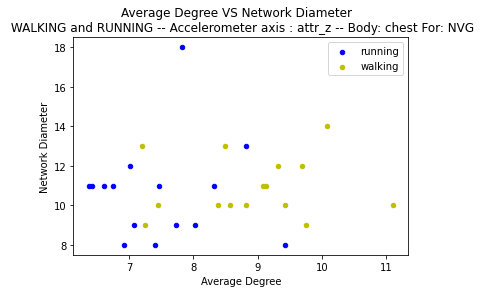

<Figure size 1080x1080 with 0 Axes>

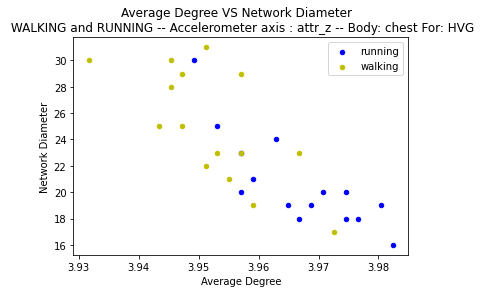

In [ ]:
#scatter plot
a = ['attr_x','attr_y','attr_z']
b_p= ['head','chest']
Method=['NVG', 'HVG']
for i in a:
  for j in b_p:
    for k in Method:
      scar = f_h_c[((f_h_c['Activity'] == 'running') & (f_h_c['Body Part']==j) &(f_h_c['Accelerometer axis']== i) &(f_h_c['Method']== k))]       #scar - scatter running
      scaw = f_h_c[((f_h_c['Activity'] == 'walking') & (f_h_c['Body Part']==j) &(f_h_c['Accelerometer axis']== i) &(f_h_c['Method']== k))]       #scaw - scatter walking
      fig = plt.figure(figsize = (15,15))
      ax = scar.plot(x='Average Degree', y='Network Diameter', kind='scatter',c = 'b', label='running', title= 'Average Degree VS Network Diameter  \n WALKING and RUNNING -- Accelerometer axis : '+i+' -- Body: '+j+' For: '+k)
      scaw.plot(x='Average Degree', y='Network Diameter', kind='scatter', c = 'y', ax=ax, label='walking')
      plt.show()




## Scatter Plot for Climbing Up and Climbing Down

<Figure size 1080x1080 with 0 Axes>

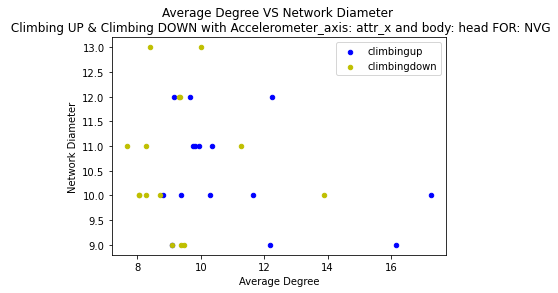

<Figure size 1080x1080 with 0 Axes>

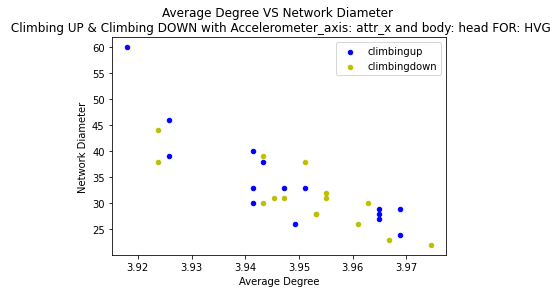

<Figure size 1080x1080 with 0 Axes>

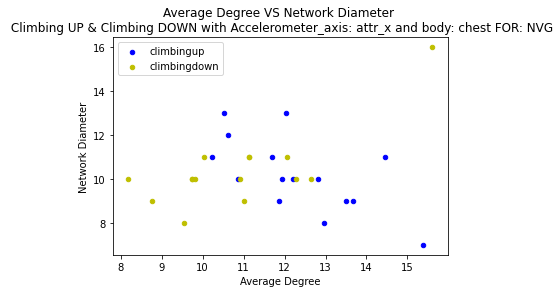

<Figure size 1080x1080 with 0 Axes>

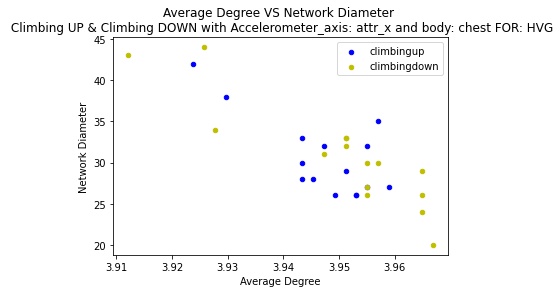

<Figure size 1080x1080 with 0 Axes>

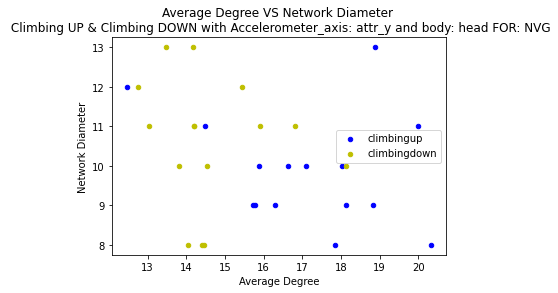

<Figure size 1080x1080 with 0 Axes>

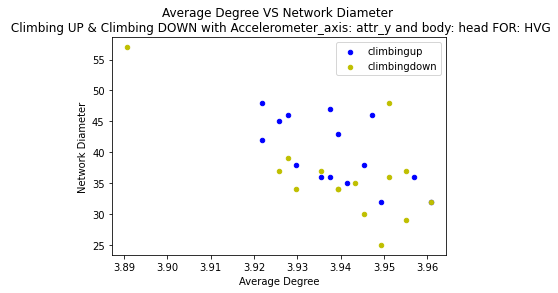

<Figure size 1080x1080 with 0 Axes>

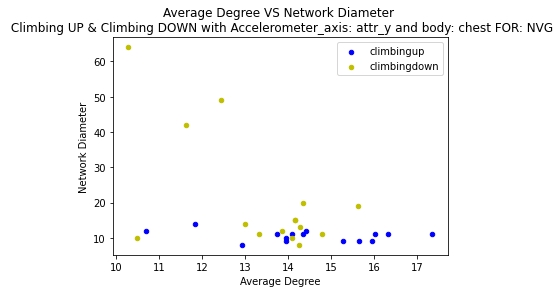

<Figure size 1080x1080 with 0 Axes>

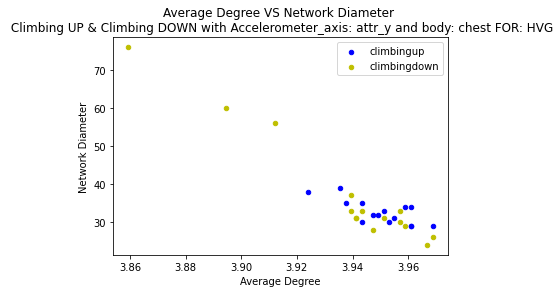

<Figure size 1080x1080 with 0 Axes>

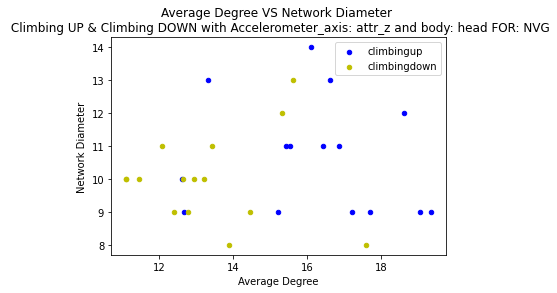

<Figure size 1080x1080 with 0 Axes>

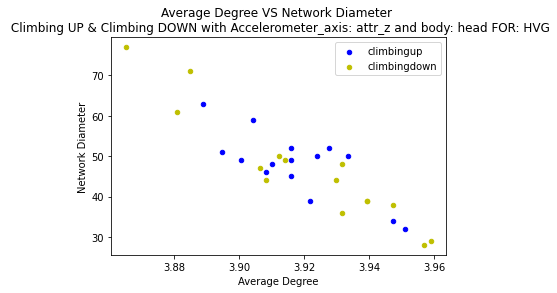

<Figure size 1080x1080 with 0 Axes>

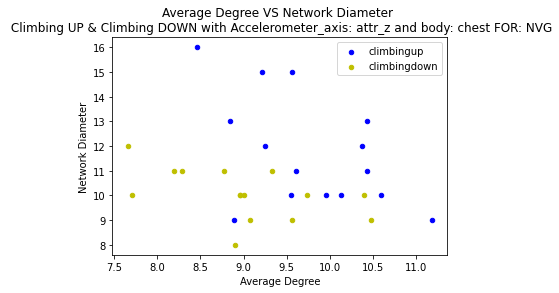

<Figure size 1080x1080 with 0 Axes>

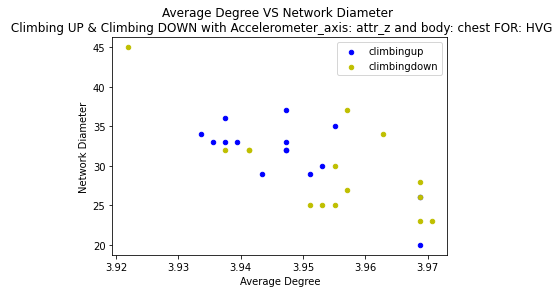

In [ ]:
#scatter plot for climbing up and climbing down
a = ['attr_x','attr_y','attr_z']                                    #a - accelerometer axis
b_p= ['head','chest']                                               #b_p - body parts
Method=['NVG', 'HVG']
for i in a:
  for j in b_p:
    for k in Method:
      scacu = f_h_c[((f_h_c['Activity'] == 'climbingup') & (f_h_c['Body Part']==j) &(f_h_c['Accelerometer axis']== i) &(f_h_c['Method']== k))]        #scacu - scatter climbing up
      scacd = f_h_c[((f_h_c['Activity'] == 'climbingdown') & (f_h_c['Body Part']==j) &(f_h_c['Accelerometer axis']== i) &(f_h_c['Method']== k))]      #scacd - scatter climbing down
      fig = plt.figure(figsize = (15,15))
      ax = scacu.plot(x='Average Degree', y='Network Diameter', kind='scatter',c = 'b', label='climbingup', title= 'Average Degree VS Network Diameter \n Climbing UP & Climbing DOWN with Accelerometer_axis: '+i+' and body: '+j+' FOR: '+k)
      scacd.plot(x='Average Degree', y='Network Diameter', kind='scatter', c = 'y', ax=ax, label='climbingdown')
      plt.show()

# QUESTION 2

## Entropy and Complexity Functions

In [ ]:
# Source : https://github.com/srk-srinivasan/Permutation-Entropy/blob/master/p_entropy.py 

def s_entropy(freq_list):
    '''This function computes the shannon entropy of a given frequency distribution'''
    freq_list = [element for element in freq_list if element != 0]
    sh_entropy = 0.0
    for freq in freq_list:
        sh_entropy += freq * np.log(freq)
    sh_entropy = -sh_entropy
    return(sh_entropy)

def ordinal_patterns(ts, embdim, embdelay):
    ''' This function computes the ordinal patterns of a time series for a given embedding dimension and embedding delay'''
    m, t = embdim, embdelay
    x = ts if isinstance(ts, np.ndarray) else np.array(ts) 

    tmp = np.zeros((x.shape[0], m))
    for i in range(m):
        tmp[:, i] = np.roll(x, i*t)
    partition = tmp[(t*m-1):, :] 
    permutation = np.argsort(partition)
    idx = _hash(permutation)

    counts = np.zeros(np.math.factorial(m))
    for i in range(counts.shape[0]):
        counts[i] = (idx == i).sum()
    return list(counts[counts != 0].astype(int))

def _hash(x):
    m, n = x.shape
    if n == 1:
        return np.zeros(m)
    return np.sum(np.apply_along_axis(lambda y: y < x[:, 0], 0, x), axis=1) * np.math.factorial(n-1) + _hash(x[:, 1:]) 
    

def p_entropy(op):
    ordinal_pat = op
    max_entropy = np.log(len(ordinal_pat))
    p = np.divide(np.array(ordinal_pat), float(sum(ordinal_pat)))
    return(s_entropy(p)/max_entropy)

def complexity(op):
    ''' This function computes the complexity of a time series defined as: Comp_JS = Q_o * JSdivergence * pe'''
    pe = p_entropy(op)
    constant1 = (0.5+((1 - 0.5)/len(op)))* np.log(0.5+((1 - 0.5)/len(op)))
    constant2 = ((1 - 0.5)/len(op))*np.log((1 - 0.5)/len(op))*(len(op) - 1)
    constant3 = 0.5*np.log(len(op))
    Q_o = -1/(constant1+constant2+constant3)

    temp_op_prob = np.divide(op, sum(op))
    temp_op_prob2 = (0.5*temp_op_prob)+(0.5*(1/len(op)))
    JSdivergence = (s_entropy(temp_op_prob2) - 0.5 * s_entropy(temp_op_prob) - 0.5 * np.log(len(op)))
    Comp_JS = Q_o * JSdivergence * pe
    return(Comp_JS)

## Code

In [ ]:
signal_length = [1024,2048,4096]
Activity=['running','walking','climbingup','climbingdown']
embedded_dimension=[3,4,5,6]
embedded_delay=[1,2,3]
Body_Part= ['head','chest']

attr1=['attr_x','attr_y','attr_z']
f_h_c1=pd.DataFrame(columns=['Subject', 'Accelerometer_axis','Signal_length','Dimension', 'Delay', 'Permutation_entropy','Complexity', 'Activity', 'Body Part' ])

for c in range(1,16):          #initializing range for the 15 subjects
  for i1 in Activity:
    for j1 in Body_Part:
      dataframe_list = []
      df = pd.read_csv('s' + str(c) + '_acc_'+ i1 +'_' + j1 +".csv")  
      for sl in signal_length:
        df1=df[0:sl]
        for at in attr1:
          for ed in embedded_dimension:
            for edy in embedded_delay:
              op= ordinal_patterns(df1[at], ed, edy)
              pe= p_entropy(op)
              comp= complexity(op)
              f_h_c1=f_h_c1.append({'Subject' : c, 'Accelerometer_axis' : at,'Signal_length': sl,'Dimension': ed, 'Delay': edy, 'Permutation_entropy': pe,'Complexity': comp,'Activity': i1, 'Body Part': j1},ignore_index=True)
              #.loc[len(result_task_2.index)] = [i,  z,y,k,  de,  pe,comp,  val, position]


In [ ]:
f_h_c1

,Subject,Accelerometer_axis,Signal_length,Dimension,Delay,Permutation_entropy,Complexity,Activity,Body Part
0,1,attr_x,1024,3,1,0.768318,0.163331,running,head
1,1,attr_x,1024,3,2,0.816689,0.141047,running,head
2,1,attr_x,1024,3,3,0.851775,0.119827,running,head
3,1,attr_x,1024,4,1,0.694745,0.220049,running,head
4,1,attr_x,1024,4,2,0.751907,0.208568,running,head
...,...,...,...,...,...,...,...,...,...
12955,15,attr_z,4096,5,2,0.942501,0.094303,climbingdown,chest
12956,15,attr_z,4096,5,3,0.972191,0.050053,climbingdown,chest
12957,15,attr_z,4096,6,1,0.844734,0.238611,climbingdown,chest
12958,15,attr_z,4096,6,2,0.935939,0.135029,climbingdown,chest


##Tabulating the Dataframe

In [ ]:
from tabulate import tabulate
print(tabulate(f_h_c1, headers=["Subject","Accelerometer axis","Signal Length","Dimension","Delay","Permutation Entropy","Complexity","Activity","Body Part"],showindex="never"))

  Subject  Accelerometer axis      Signal Length    Dimension    Delay    Permutation Entropy    Complexity  Activity      Body Part
---------  --------------------  ---------------  -----------  -------  ---------------------  ------------  ------------  -----------
        1  attr_x                           1024            3        1               0.768318   0.163331     running       head
        1  attr_x                           1024            3        2               0.816689   0.141047     running       head
        1  attr_x                           1024            3        3               0.851775   0.119827     running       head
        1  attr_x                           1024            4        1               0.694745   0.220049     running       head
        1  attr_x                           1024            4        2               0.751907   0.208568     running       head
        1  attr_x                           1024            4        3               0.77915

## Scatter Plot for Walkling and Running


<Figure size 1080x1080 with 0 Axes>

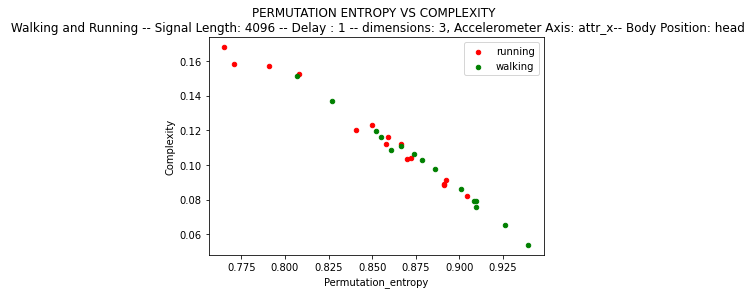

<Figure size 1080x1080 with 0 Axes>

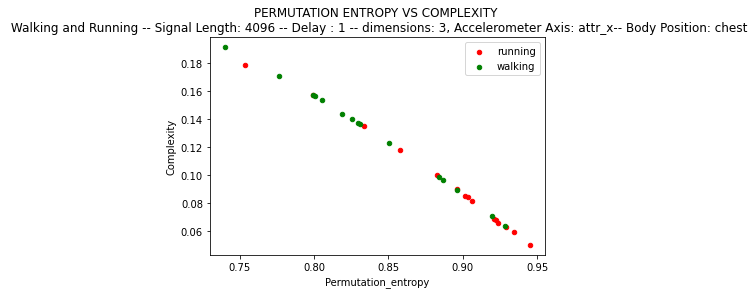

<Figure size 1080x1080 with 0 Axes>

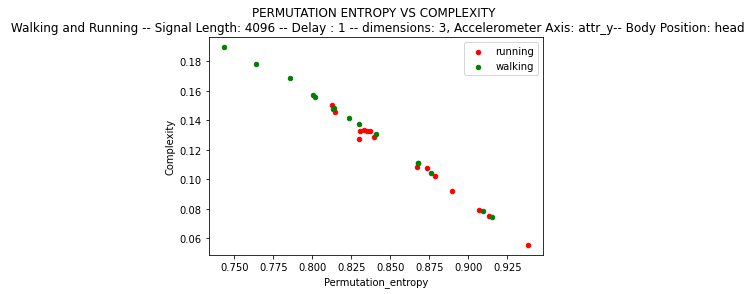

<Figure size 1080x1080 with 0 Axes>

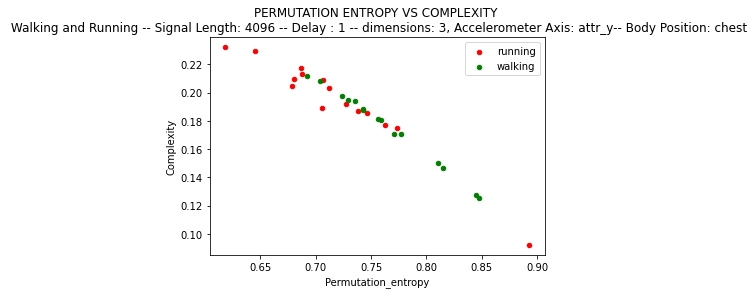

<Figure size 1080x1080 with 0 Axes>

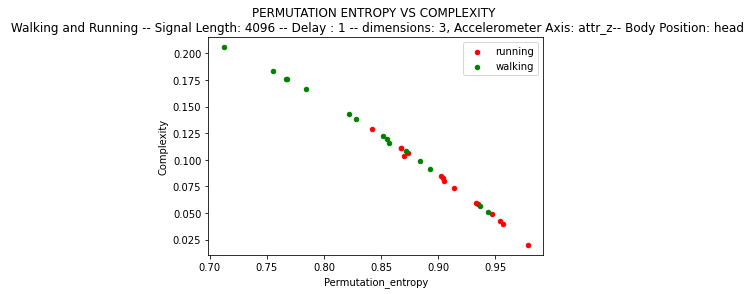

<Figure size 1080x1080 with 0 Axes>

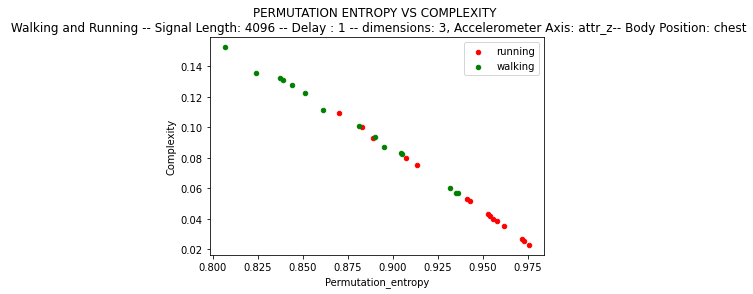

<Figure size 1080x1080 with 0 Axes>

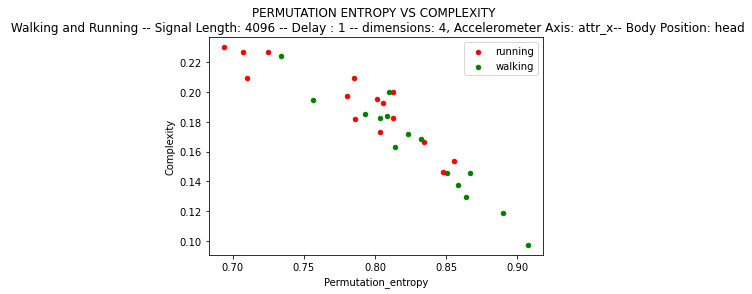

<Figure size 1080x1080 with 0 Axes>

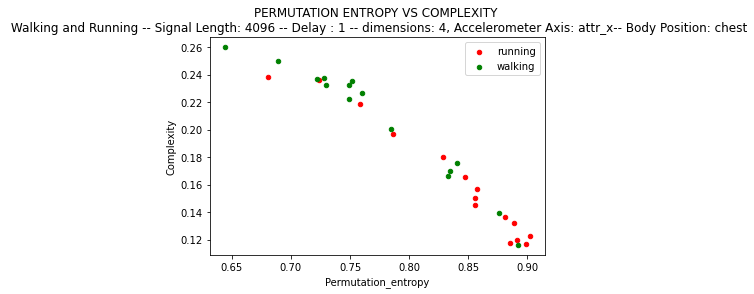

<Figure size 1080x1080 with 0 Axes>

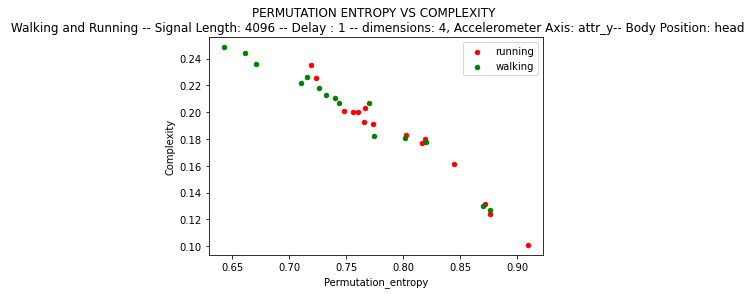

<Figure size 1080x1080 with 0 Axes>

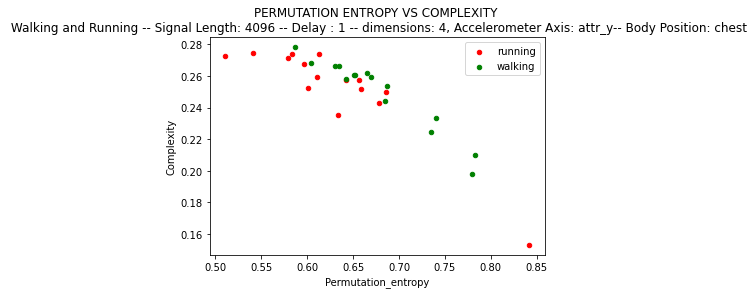

<Figure size 1080x1080 with 0 Axes>

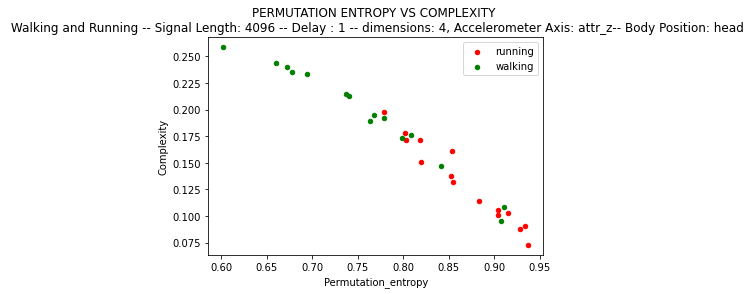

<Figure size 1080x1080 with 0 Axes>

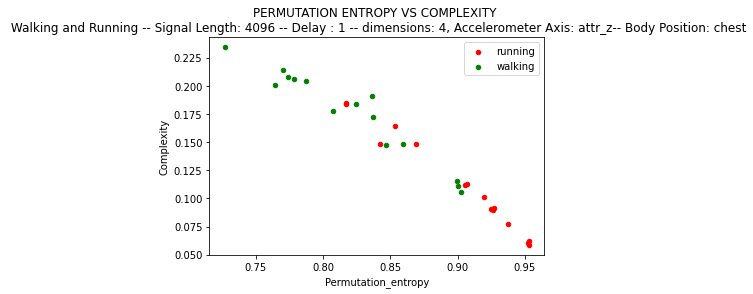

<Figure size 1080x1080 with 0 Axes>

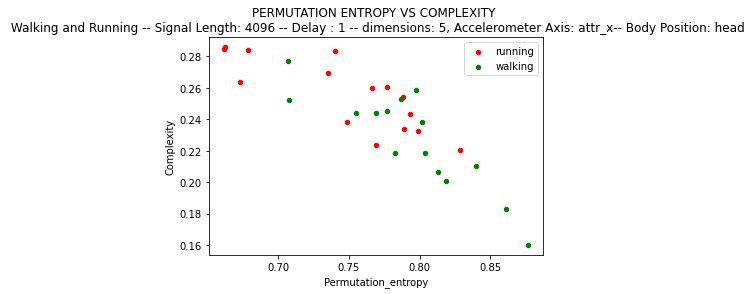

<Figure size 1080x1080 with 0 Axes>

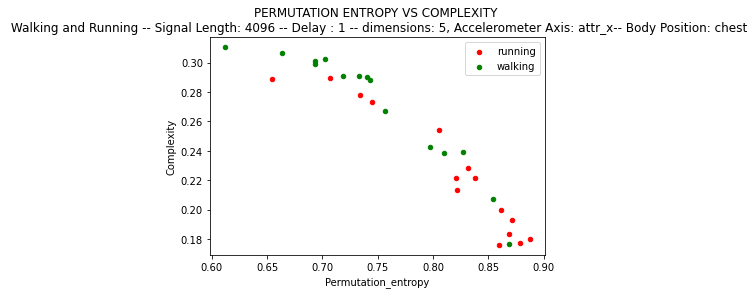

<Figure size 1080x1080 with 0 Axes>

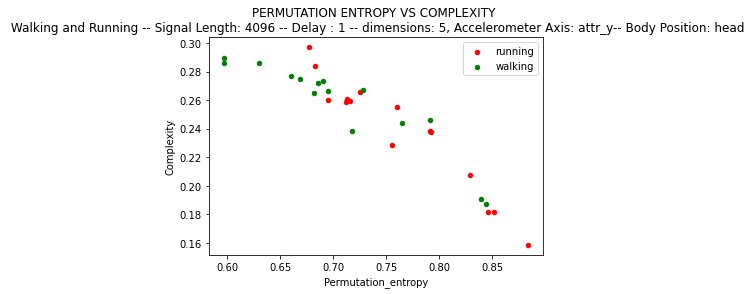

<Figure size 1080x1080 with 0 Axes>

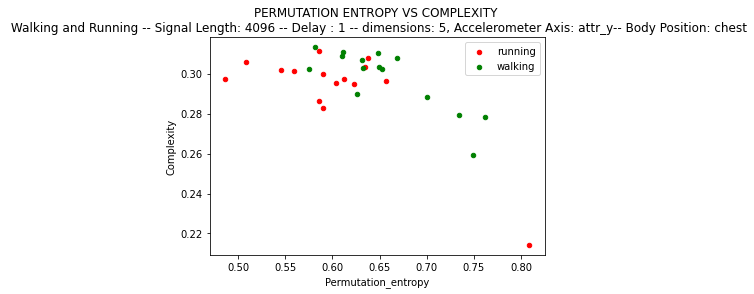

<Figure size 1080x1080 with 0 Axes>

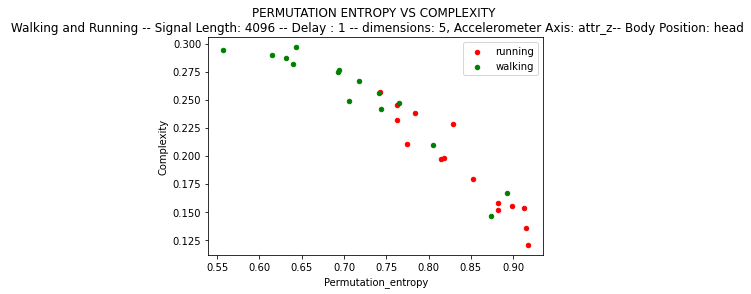

<Figure size 1080x1080 with 0 Axes>

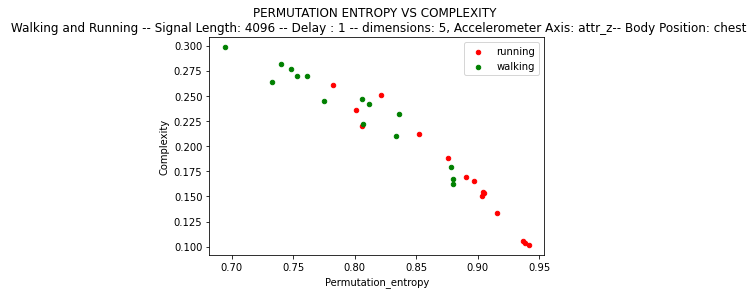

<Figure size 1080x1080 with 0 Axes>

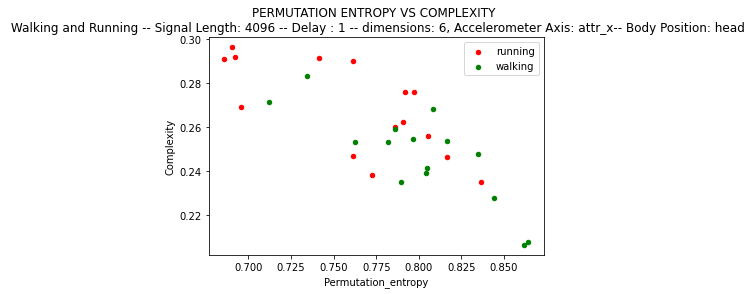

<Figure size 1080x1080 with 0 Axes>

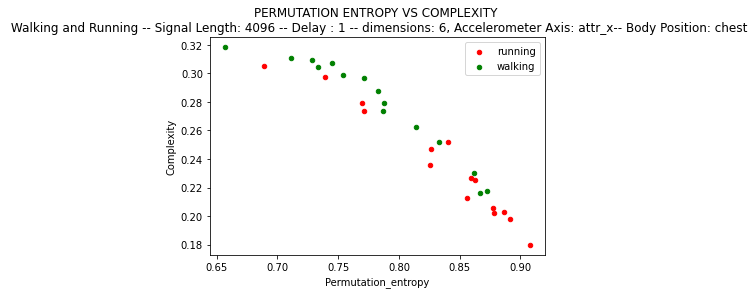

<Figure size 1080x1080 with 0 Axes>

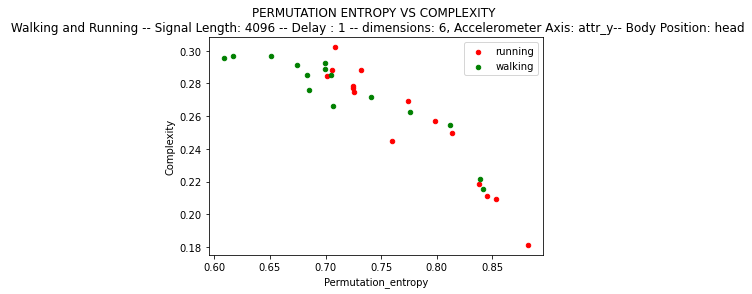

<Figure size 1080x1080 with 0 Axes>

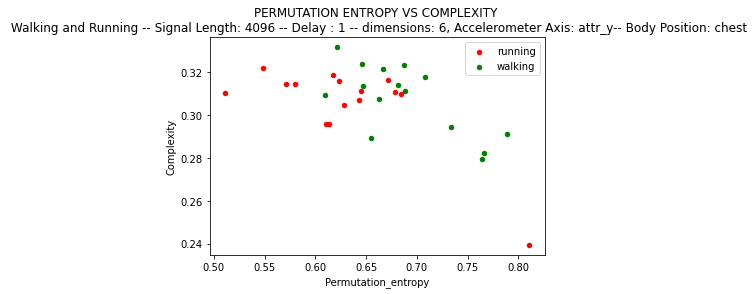

<Figure size 1080x1080 with 0 Axes>

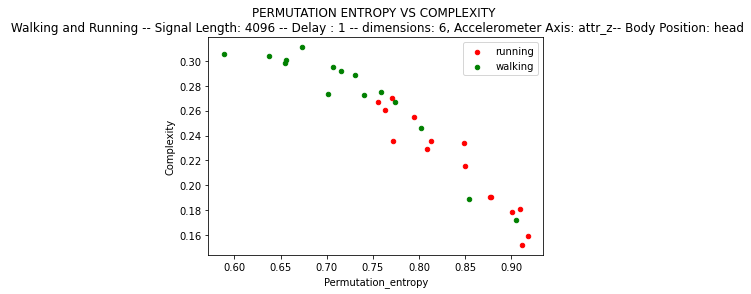

<Figure size 1080x1080 with 0 Axes>

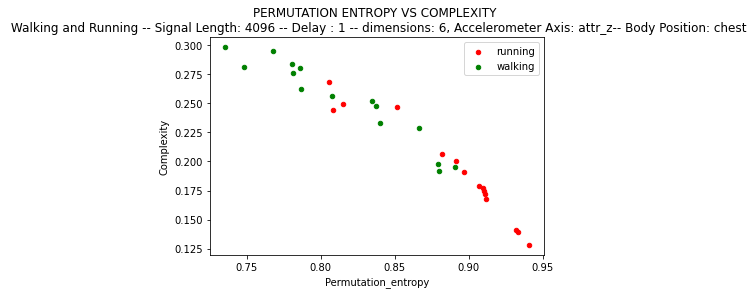

In [ ]:
attr=['attr_x','attr_y','attr_z']
Body_Part= ['head','chest']
for i in range(3,7):               #using range function for the embedded dimension criteria
  for j in attr:
    for k in Body_Part:
      scar1 = f_h_c1[((f_h_c1['Activity'] == 'running') & (f_h_c1['Signal_length']== 4096) & (f_h_c1['Delay']==1) & (f_h_c1['Dimension']==i) &(f_h_c1['Accelerometer_axis']== j) &(f_h_c1['Body Part']==k))]                               #scar1 - scatter running 1
      scaw1 = f_h_c1[((f_h_c1['Activity'] == 'walking') & (f_h_c1['Signal_length']== 4096) & (f_h_c1['Delay']==1) & (f_h_c1['Dimension']==i) &(f_h_c1['Accelerometer_axis']== j) &(f_h_c1['Body Part']==k))]                               #scaw2 - scatter walking 1
      fig = plt.figure(figsize = (15,15))
      ax = scar1.plot(x='Permutation_entropy', y='Complexity', kind='scatter', c='r',label='running', title= 'PERMUTATION ENTROPY VS COMPLEXITY \n Walking and Running -- Signal Length: 4096 -- Delay : 1 -- dimensions: '+str(i)+', Accelerometer Axis: '+j+'-- Body Position: '+ k)
      scaw1.plot(x='Permutation_entropy', y='Complexity', kind='scatter', ax=ax, c='g', label='walking')
      plt.show()

## Scatter Plot of Climbing Up and Climbing Down

<Figure size 1080x1080 with 0 Axes>

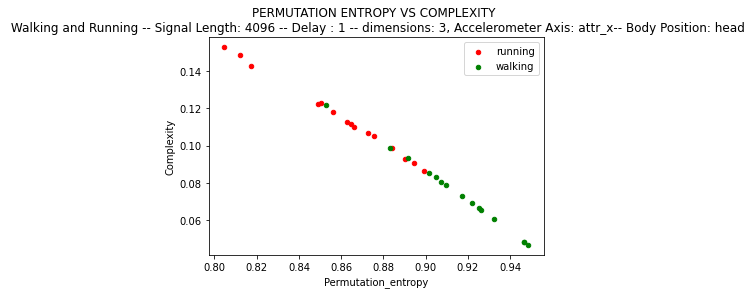

<Figure size 1080x1080 with 0 Axes>

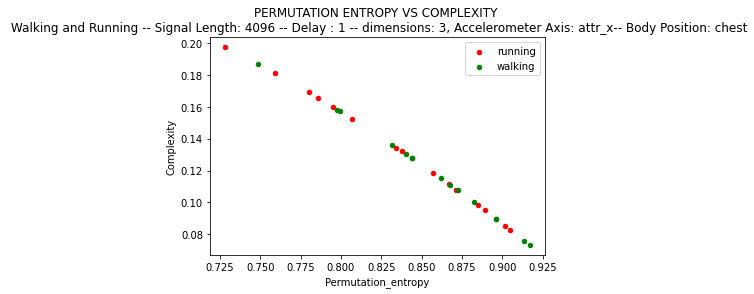

<Figure size 1080x1080 with 0 Axes>

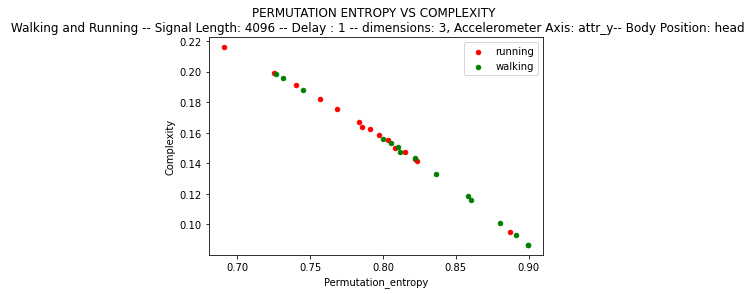

<Figure size 1080x1080 with 0 Axes>

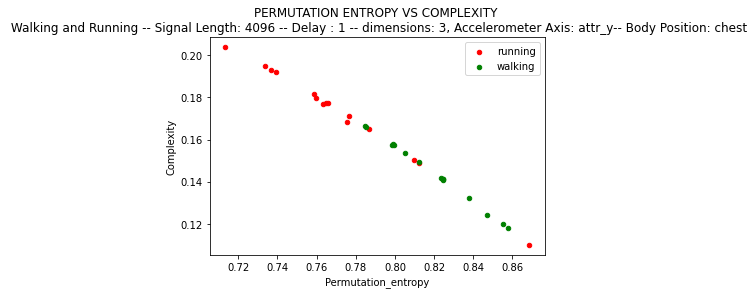

<Figure size 1080x1080 with 0 Axes>

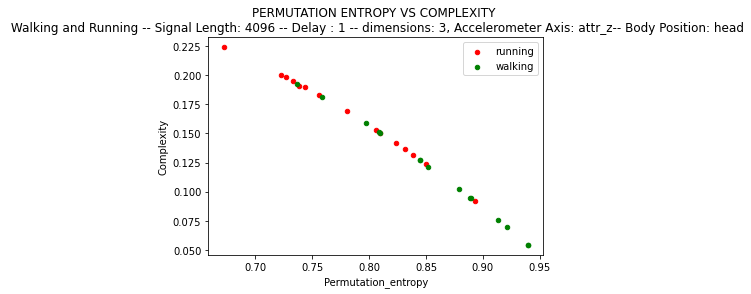

<Figure size 1080x1080 with 0 Axes>

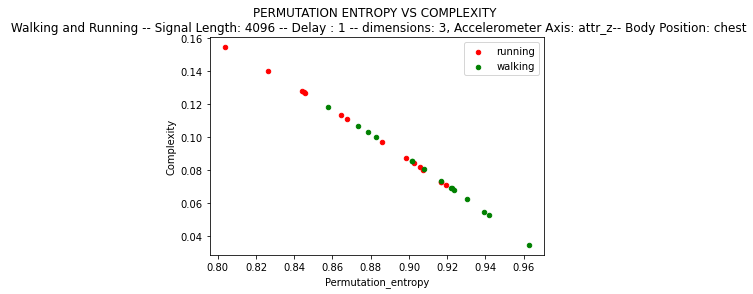

<Figure size 1080x1080 with 0 Axes>

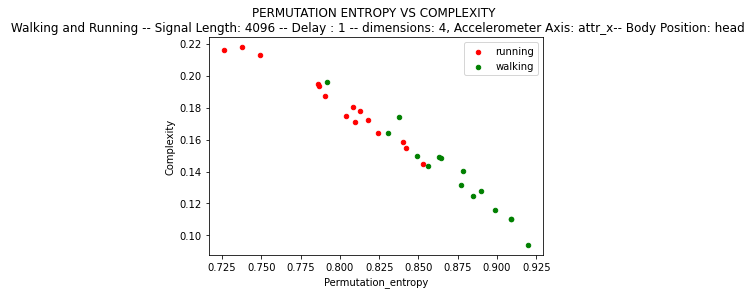

<Figure size 1080x1080 with 0 Axes>

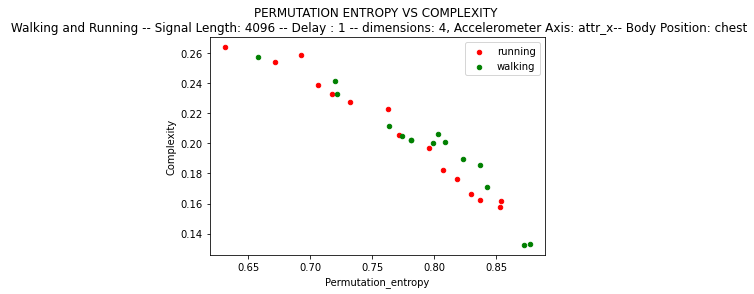

<Figure size 1080x1080 with 0 Axes>

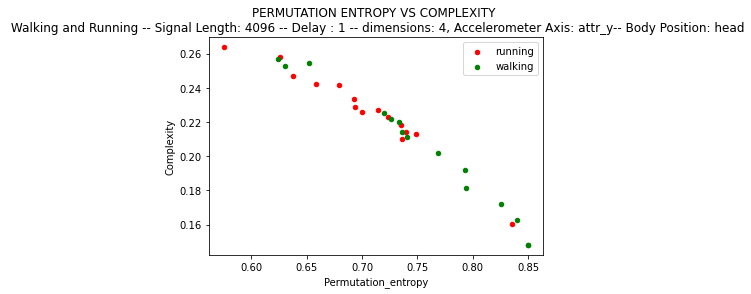

<Figure size 1080x1080 with 0 Axes>

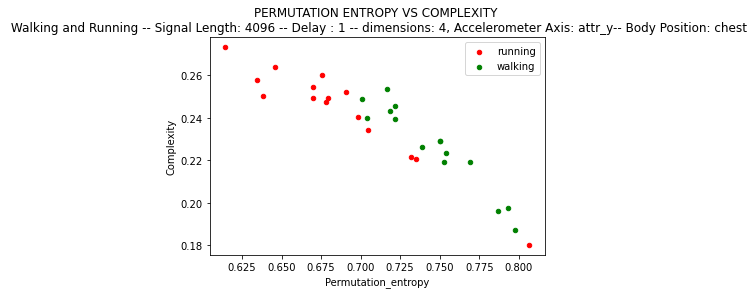

<Figure size 1080x1080 with 0 Axes>

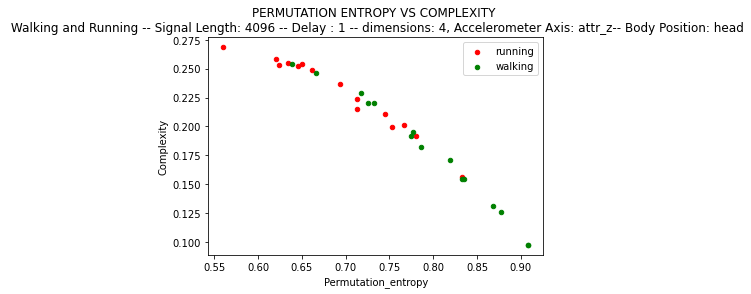

<Figure size 1080x1080 with 0 Axes>

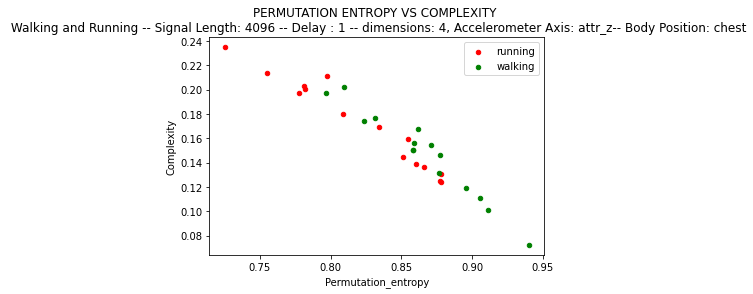

<Figure size 1080x1080 with 0 Axes>

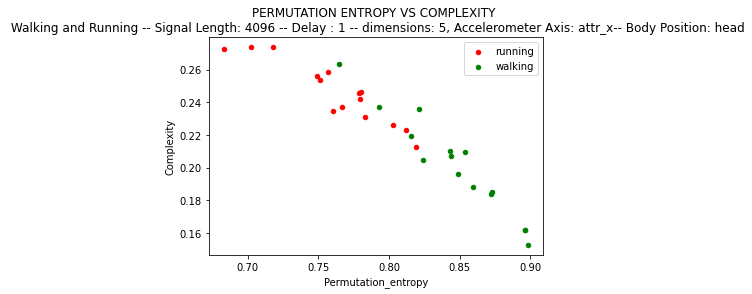

<Figure size 1080x1080 with 0 Axes>

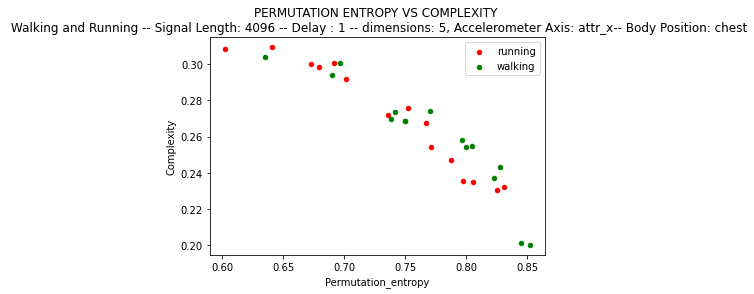

<Figure size 1080x1080 with 0 Axes>

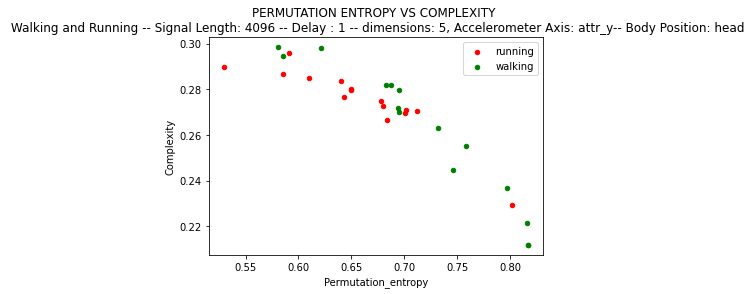

<Figure size 1080x1080 with 0 Axes>

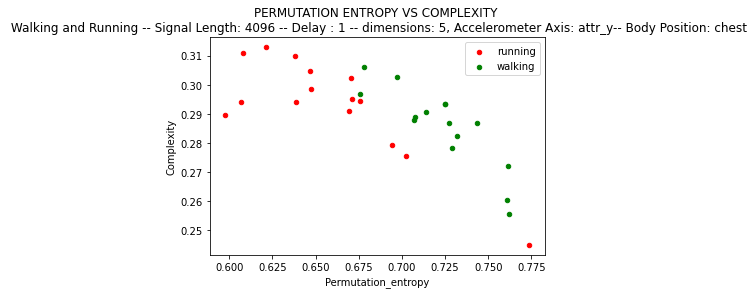

<Figure size 1080x1080 with 0 Axes>

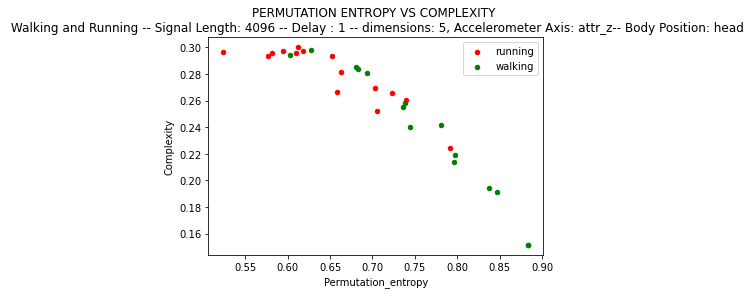

<Figure size 1080x1080 with 0 Axes>

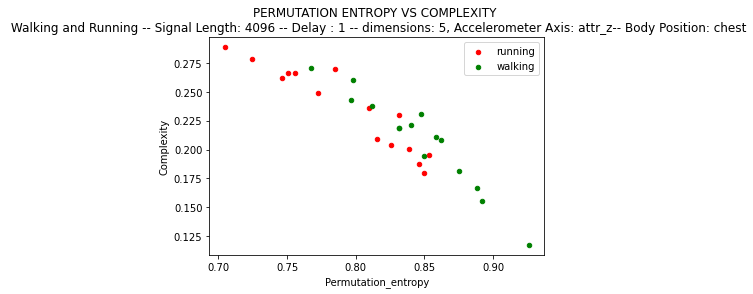

<Figure size 1080x1080 with 0 Axes>

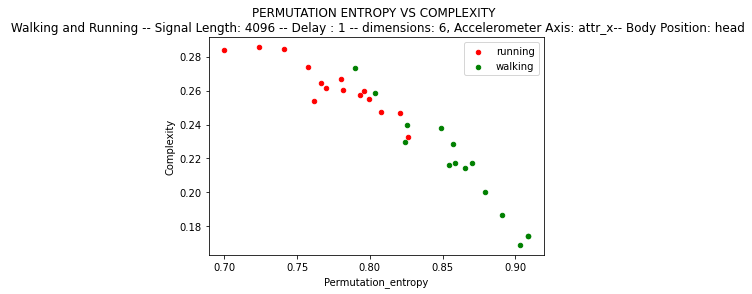

<Figure size 1080x1080 with 0 Axes>

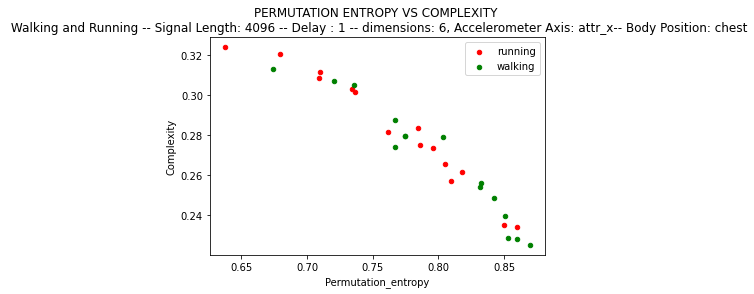

<Figure size 1080x1080 with 0 Axes>

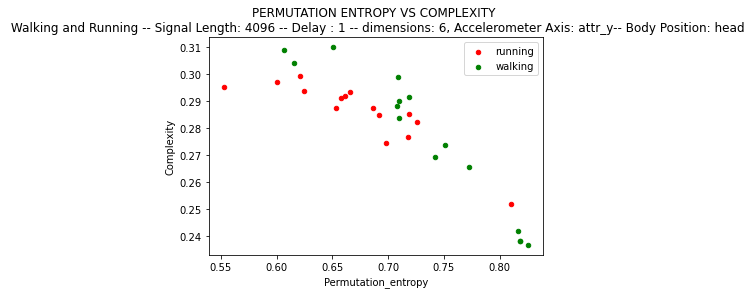

<Figure size 1080x1080 with 0 Axes>

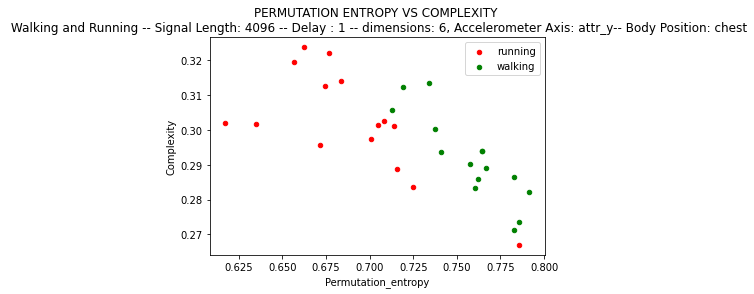

<Figure size 1080x1080 with 0 Axes>

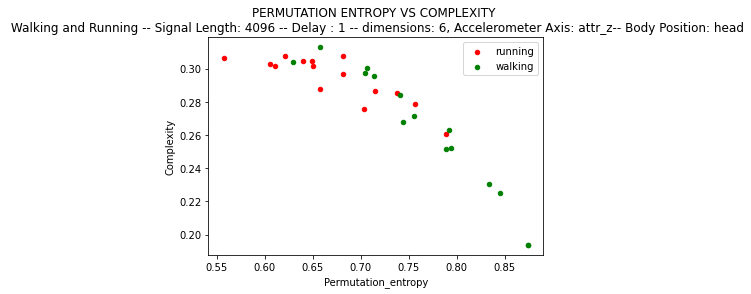

<Figure size 1080x1080 with 0 Axes>

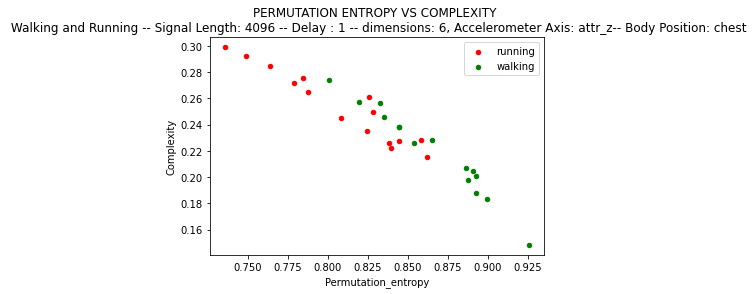

In [ ]:
attr=['attr_x','attr_y','attr_z']
Body_Part= ['head','chest']
for i in range(3,7):
  for j in attr:
    for k in Body_Part:
      scacu1 = f_h_c1[((f_h_c1['Activity'] == 'climbingup') & (f_h_c1['Signal_length']== 4096) & (f_h_c1['Delay']==1) & (f_h_c1['Dimension']==i) &(f_h_c1['Accelerometer_axis']== j) &(f_h_c1['Body Part']==k))]                #scacu1 - scatter climbing up1
      scacd1 = f_h_c1[((f_h_c1['Activity'] == 'climbingdown') & (f_h_c1['Signal_length']== 4096) & (f_h_c1['Delay']==1) & (f_h_c1['Dimension']==i) &(f_h_c1['Accelerometer_axis']== j) &(f_h_c1['Body Part']==k))]              #scacd1 - scatter climbing down1
      fig = plt.figure(figsize = (15,15))
      ax = scacu1.plot(x='Permutation_entropy', y='Complexity', kind='scatter', c='r',label='running', title= 'PERMUTATION ENTROPY VS COMPLEXITY \n Walking and Running -- Signal Length: 4096 -- Delay : 1 -- dimensions: '+str(i)+', Accelerometer Axis: '+j+'-- Body Position: '+ k)
      scacd1.plot(x='Permutation_entropy', y='Complexity', kind='scatter', ax=ax, c='g', label='walking')
      plt.show()

#converting file to HTML